<a href="https://colab.research.google.com/github/Windtwist/NNE-project/blob/main/food_detection_nnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/201.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="ttWTKlWAVqEADHuROP8I")
project = rf.workspace("college-gg4mu").project("food-image-segmentation-using-yolov5")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Image-Segmentation-using-YOLOv5-1 in yolov8:: 100%|██████████| 7004/7004 [00:01<00:00, 5300.58it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 132MB/s] 
New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Food-Image-Segmentation-using-YOLOv5-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1712537898.0fa4004b9282.2038.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2295.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2296.jpg  weights
P_curve.png					    train_batch2297.jpg
PR_curve.png					    train_batch2.jpg


/content


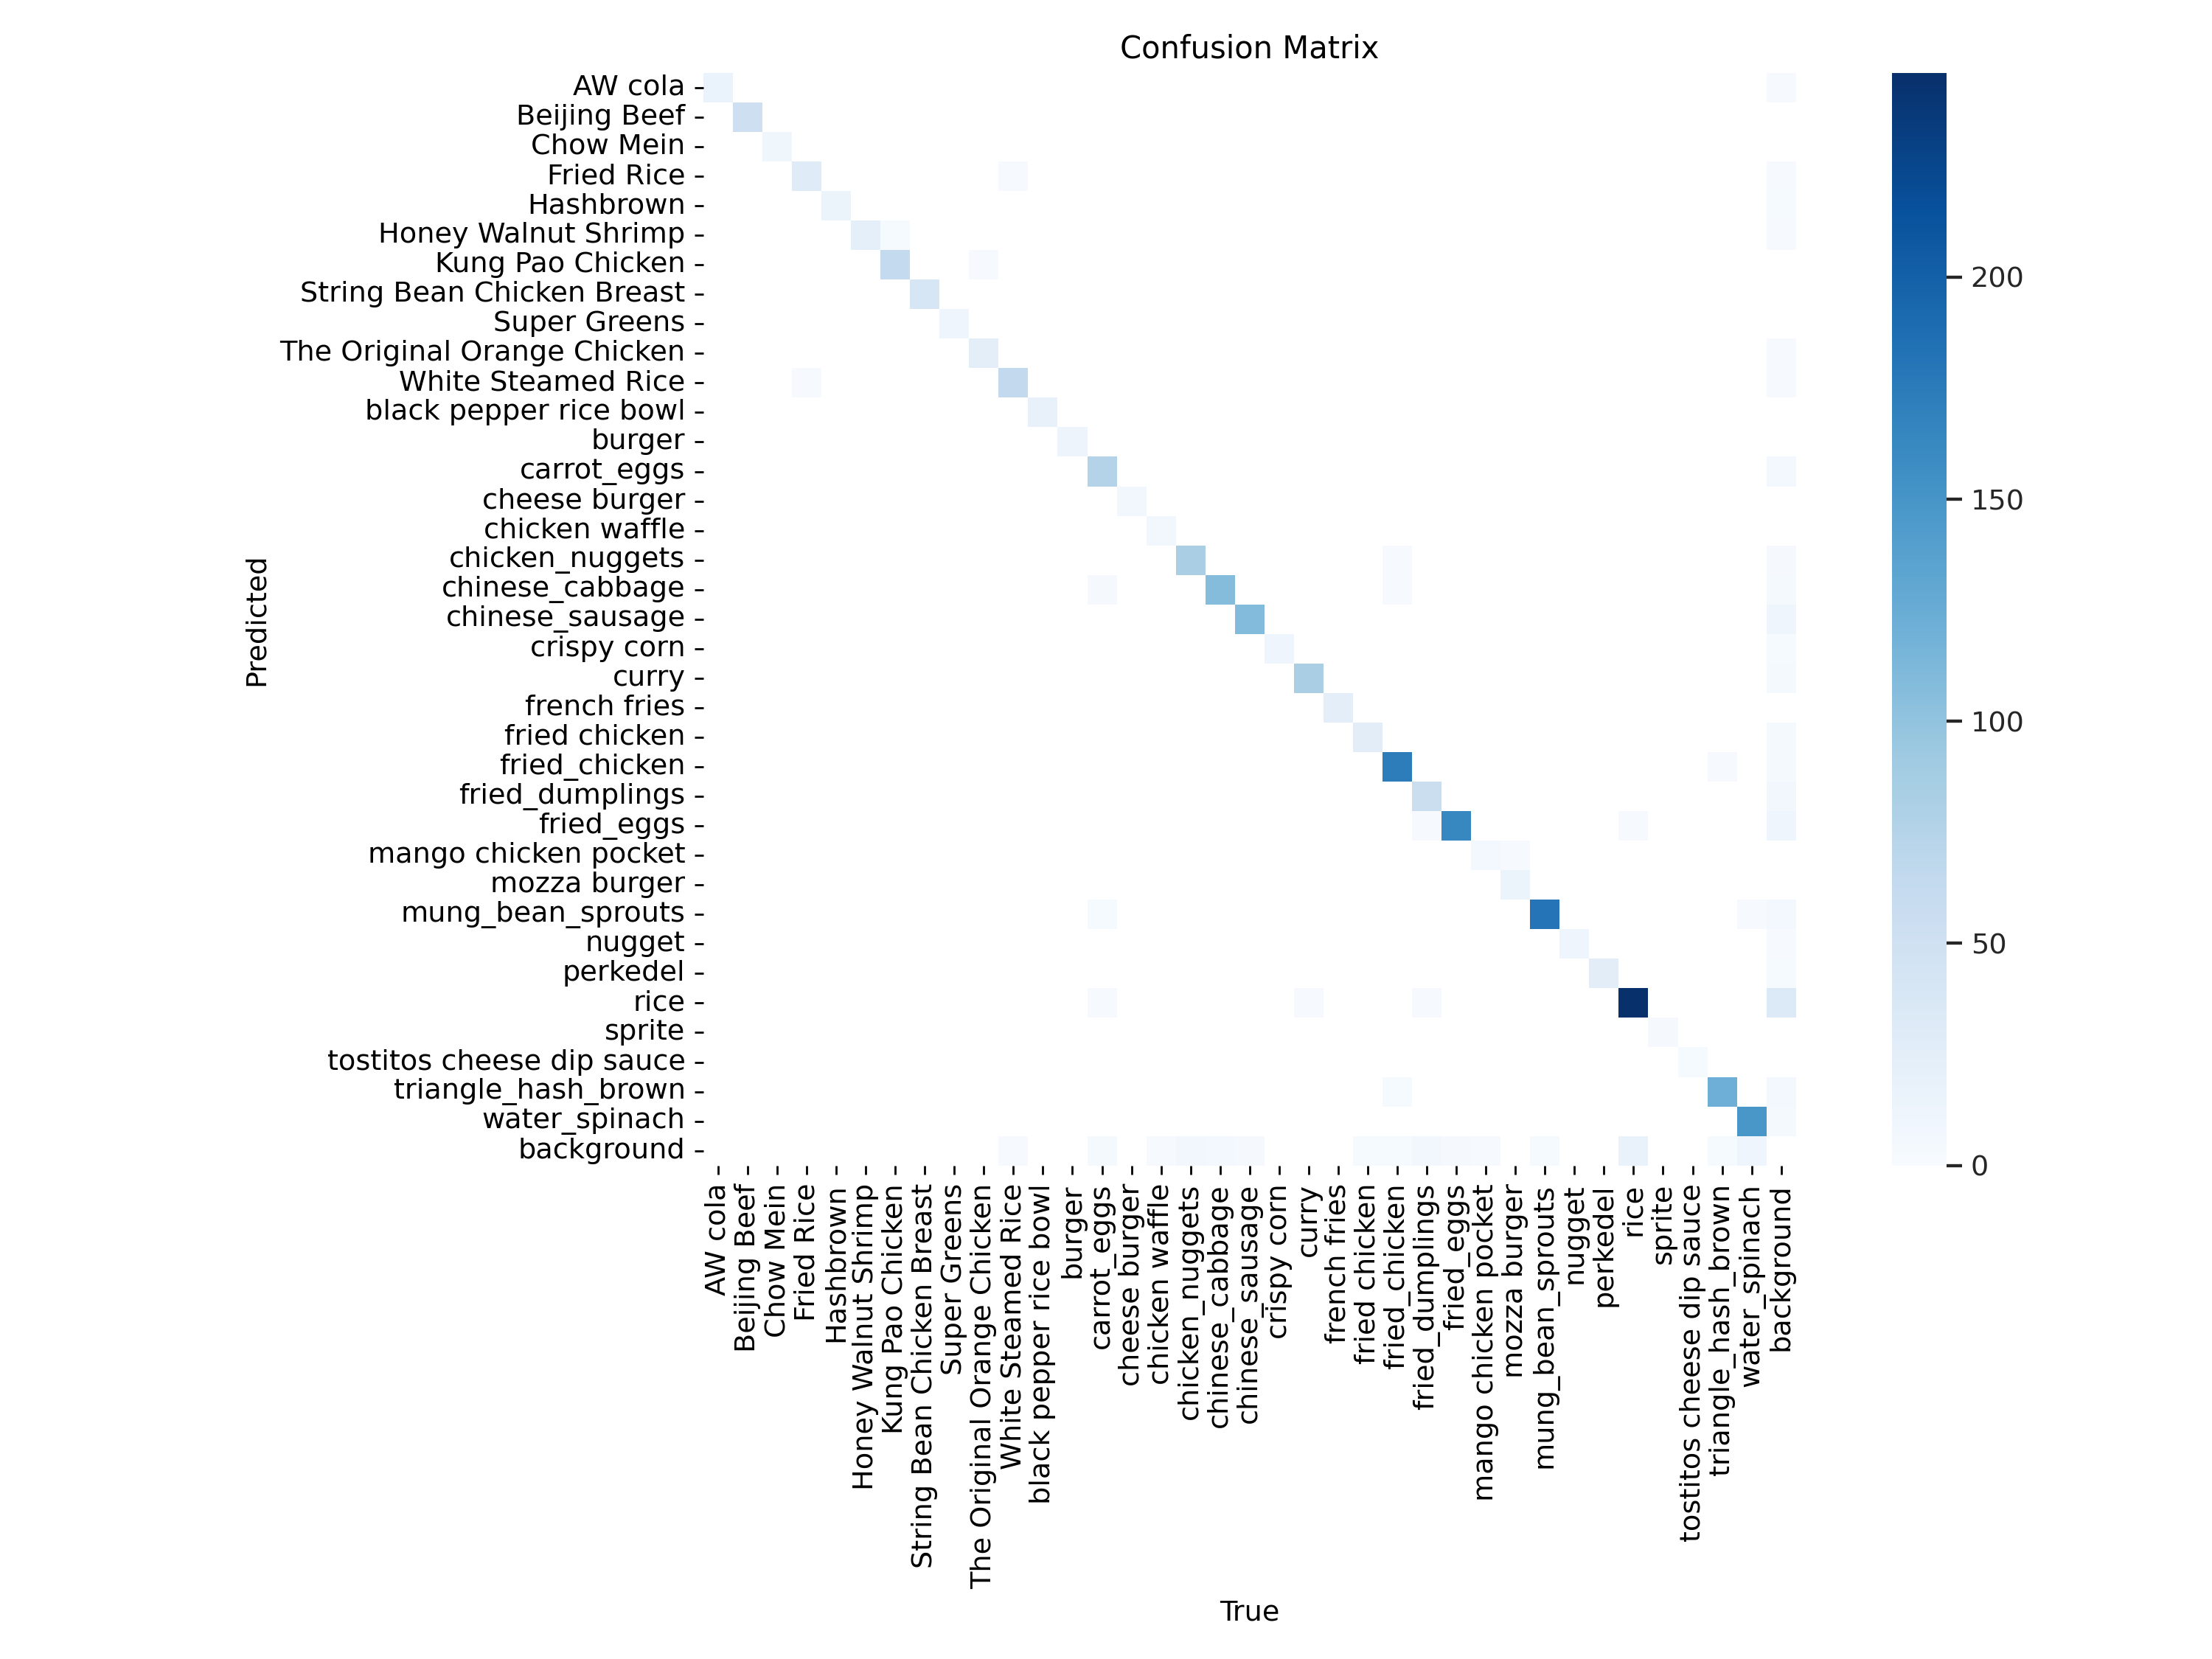

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


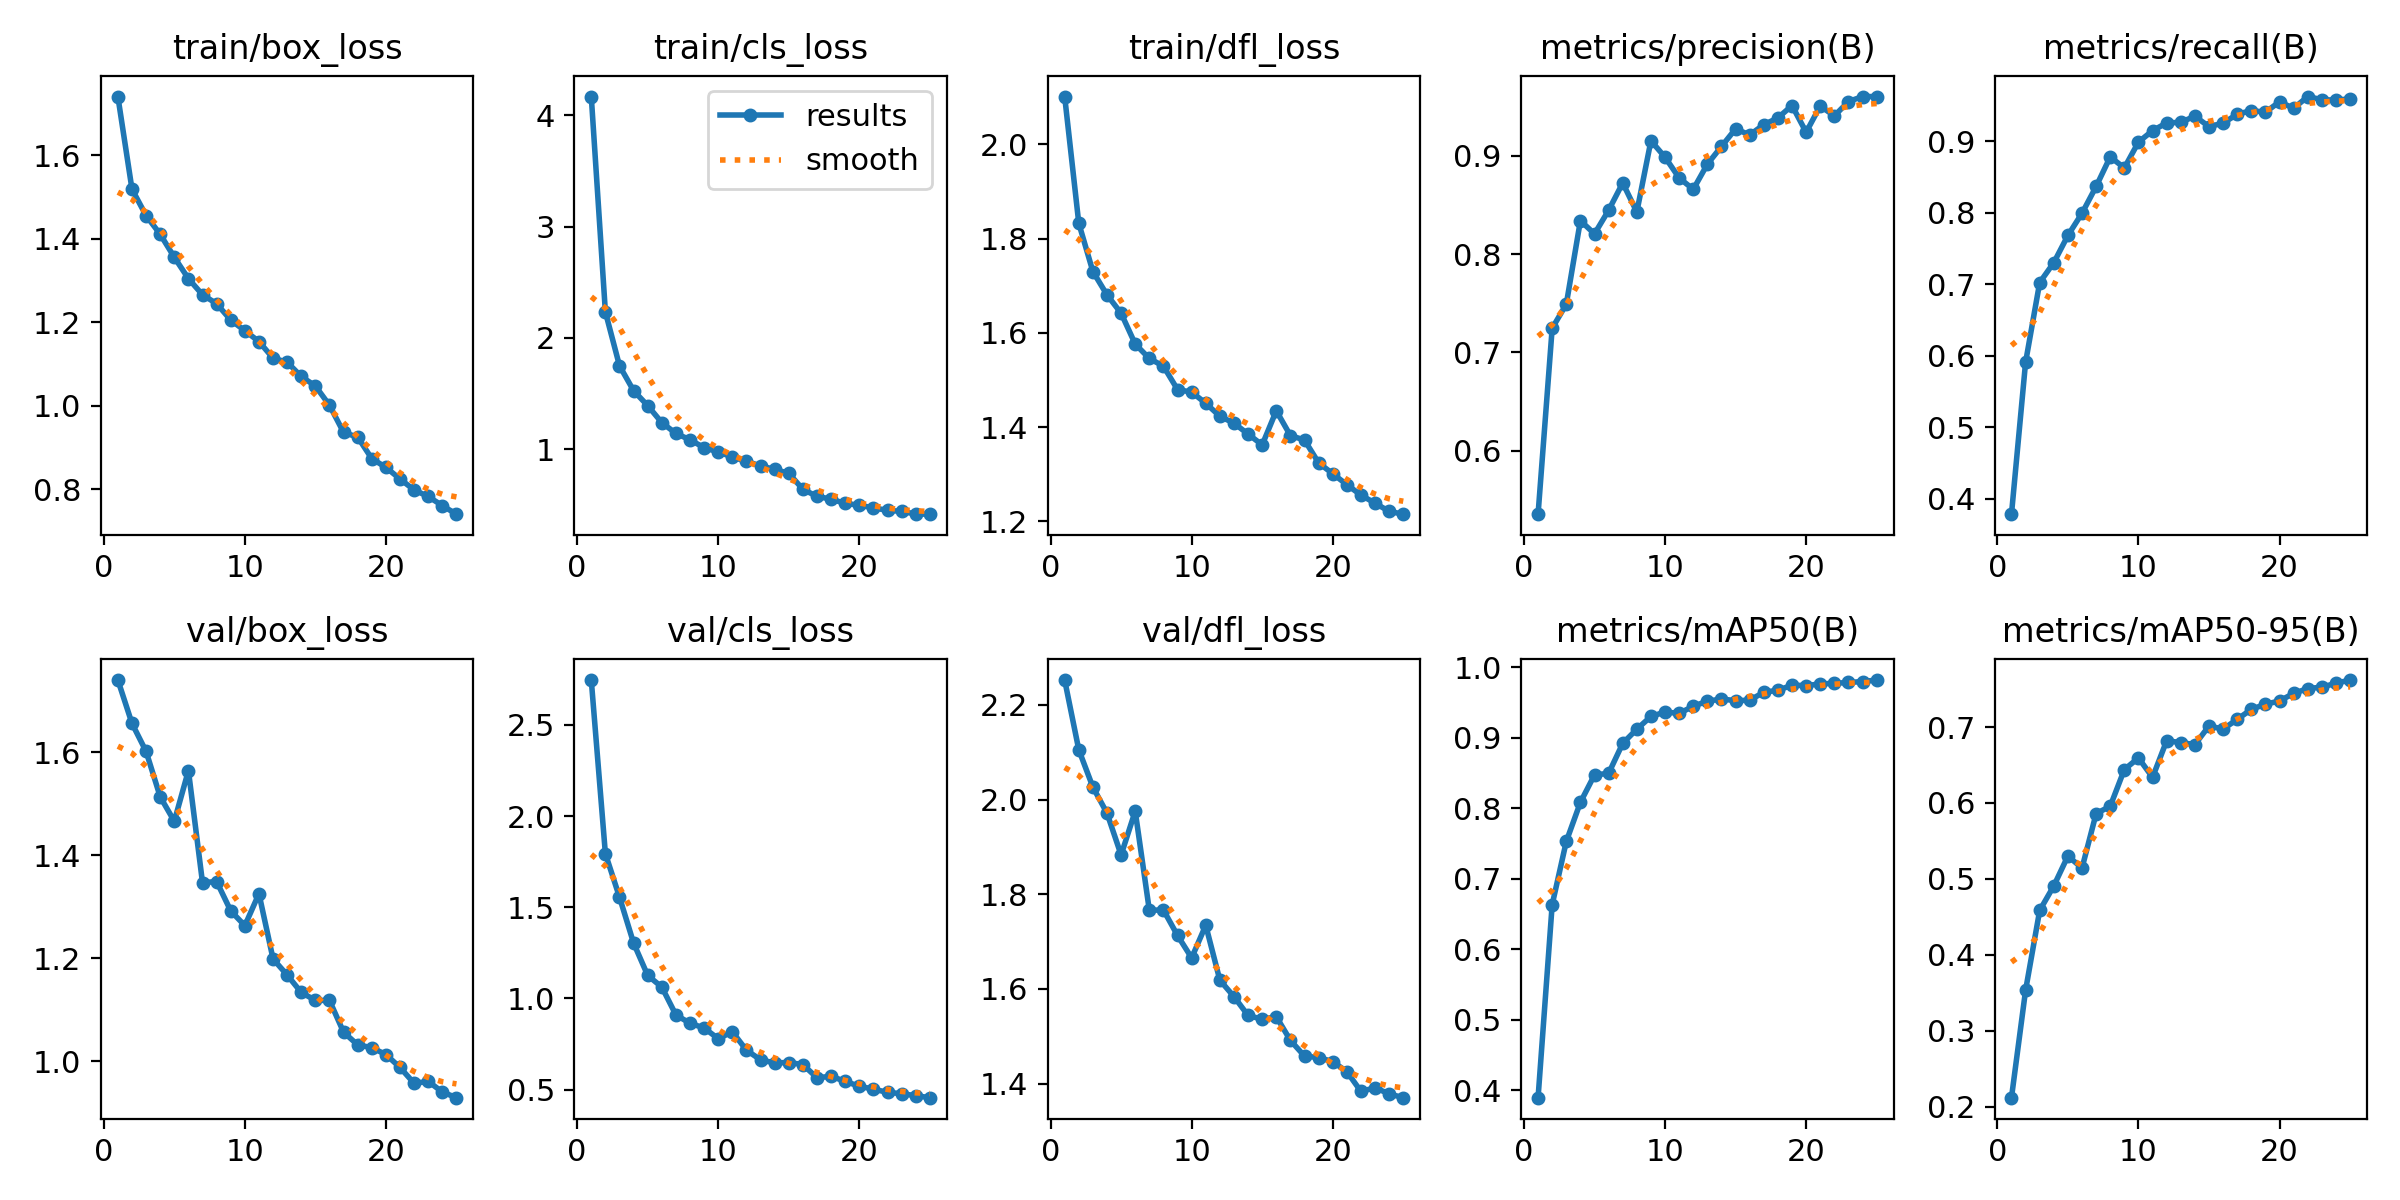

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


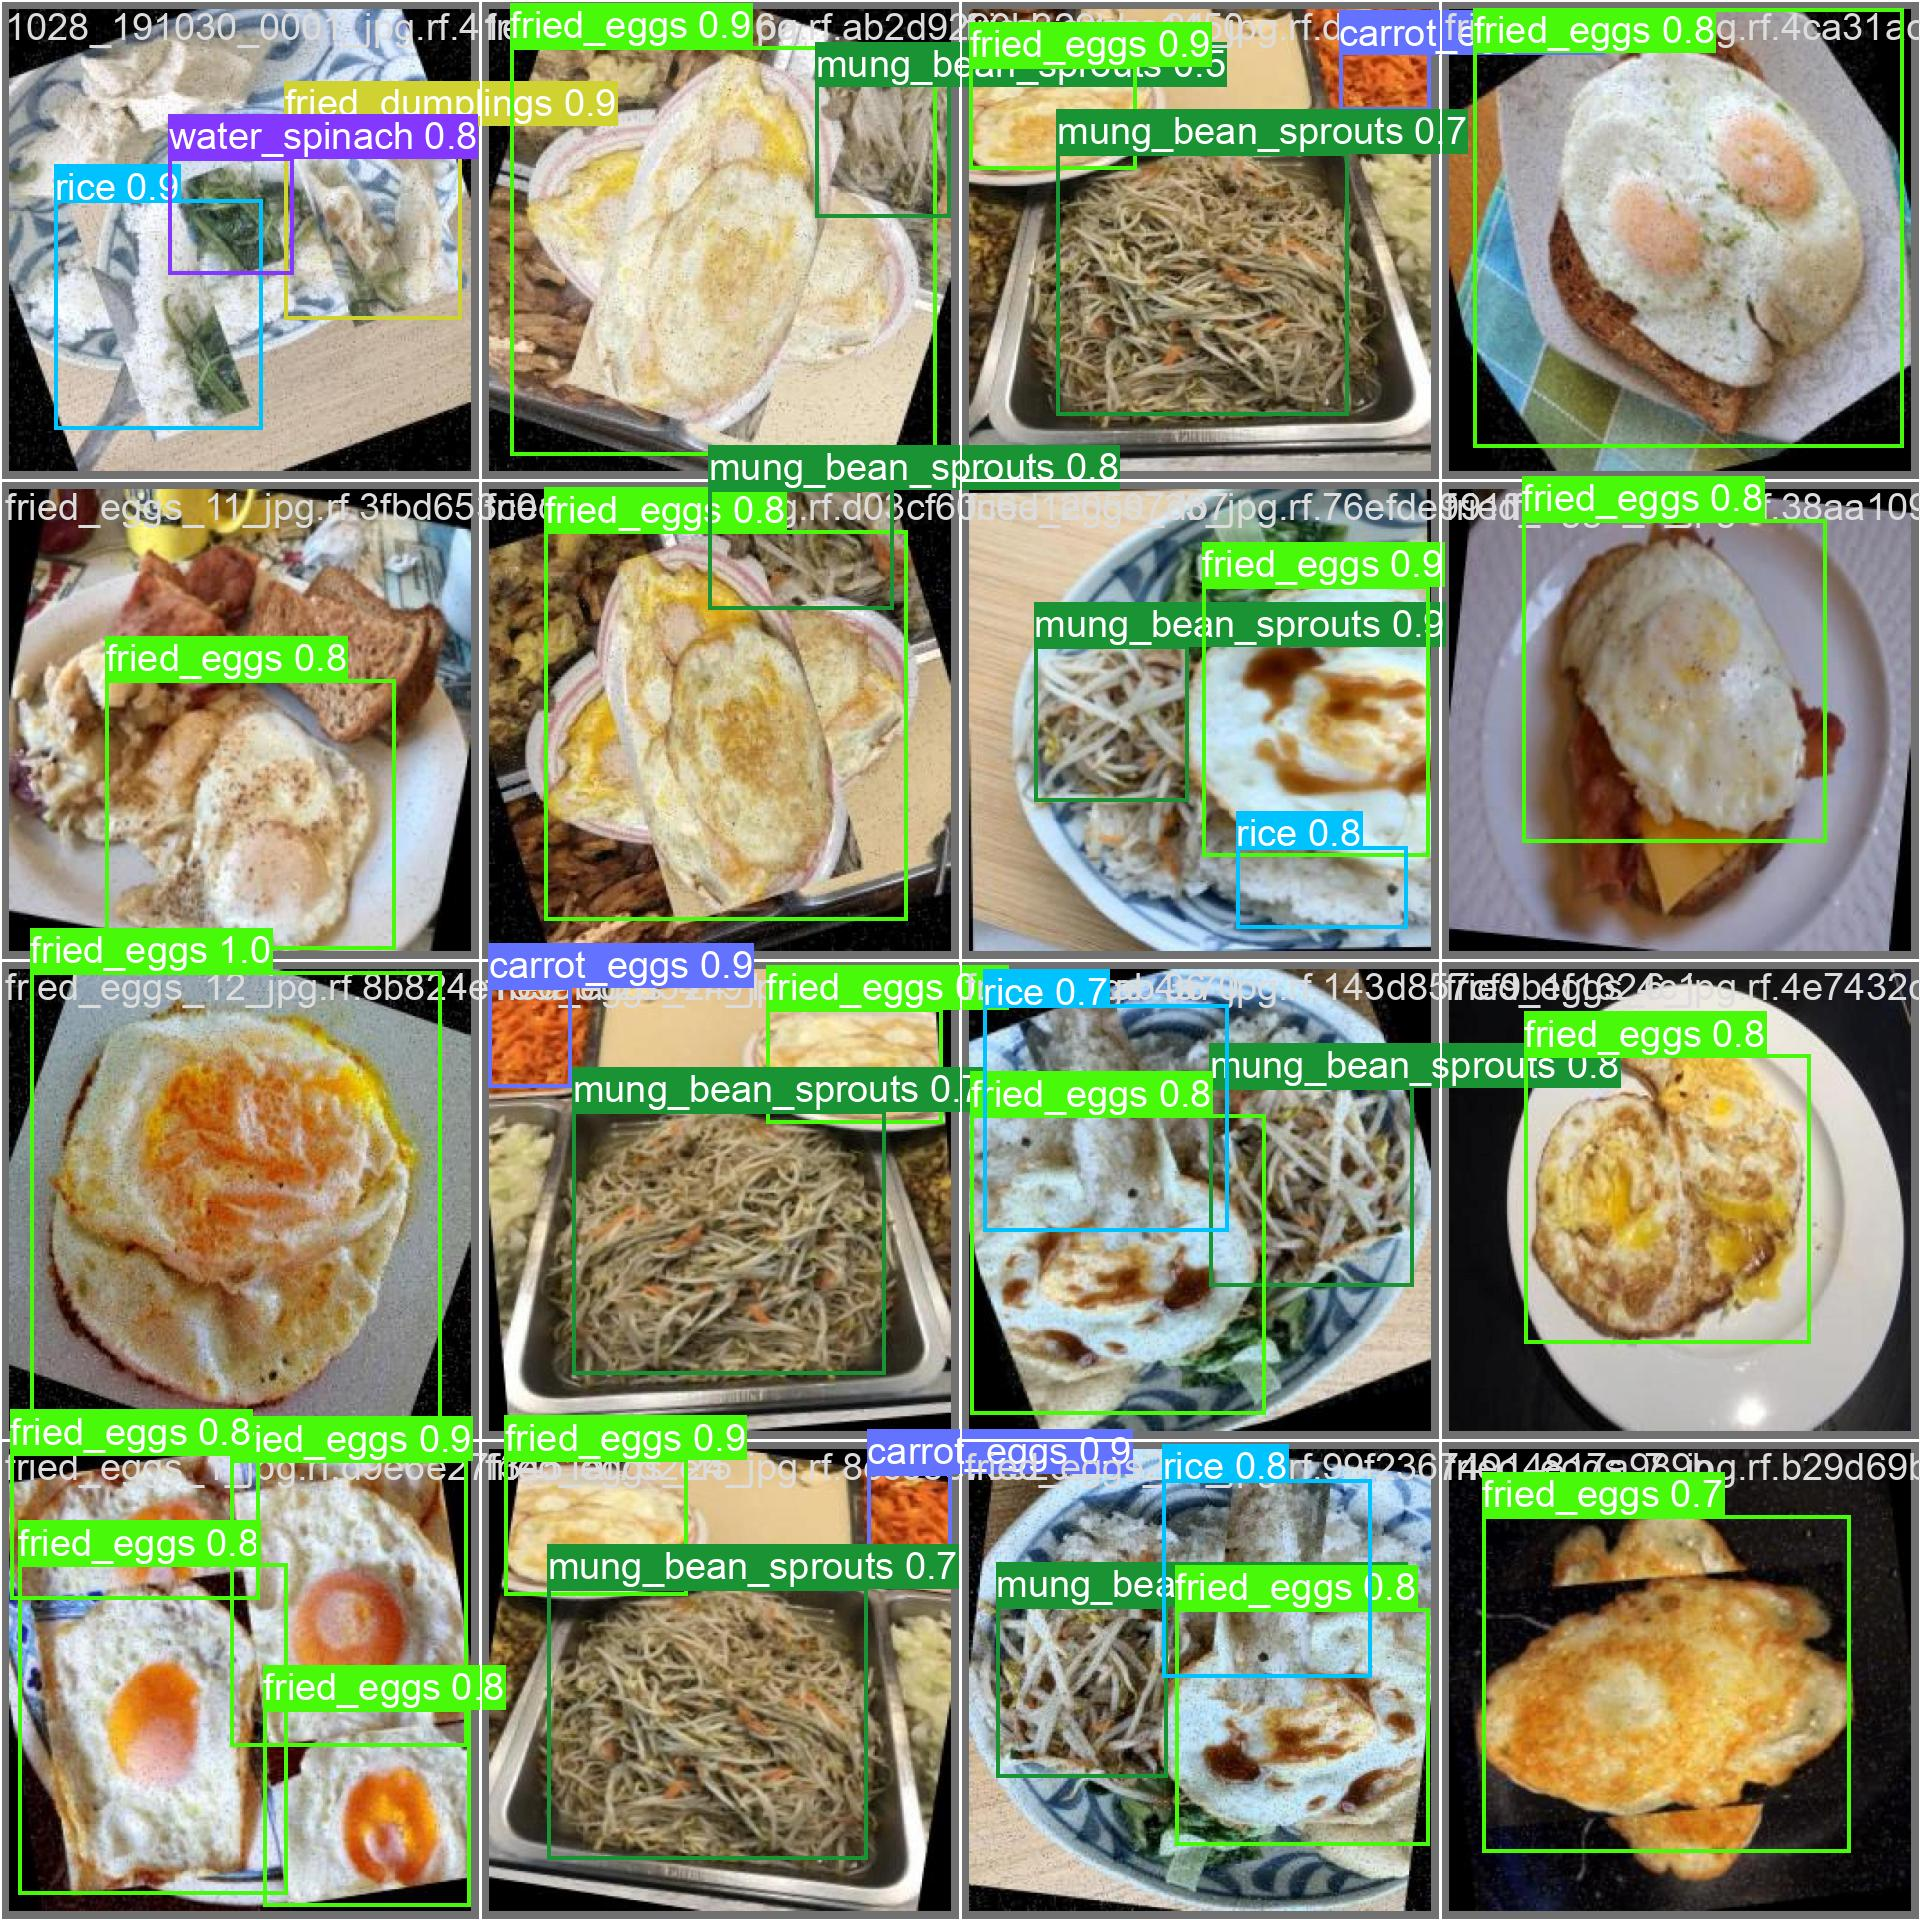

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139516 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Food-Image-Segmentation-using-YOLOv5-1/valid/labels.cache... 699 images, 0 backgrounds, 0 corrupt: 100% 699/699 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 44/44 [00:16<00:00,  2.65it/s]
                   all        699       2164      0.959      0.958      0.981      0.762
               AW cola        699         17      0.928          1      0.956      0.822
          Beijing Beef        699         53      0.994          1      0.995        0.9
             Chow Mein        699         10      0.963          1      0.995      0.953
            Fried Rice        699         31       0.96          1      0.994      0.833
             Hashbrown        699         15      0.981          1      0.995      0.722
 

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139516 parameters, 0 gradients, 28.5 GFLOPs

image 1/350 /content/datasets/Food-Image-Segmentation-using-YOLOv5-1/test/images/1028_191030_0002_jpg.rf.5e54647a688dfc6354135420fc1e994f.jpg: 800x800 1 fried_dumplings, 1 rice, 22.7ms
image 2/350 /content/datasets/Food-Image-Segmentation-using-YOLOv5-1/test/images/1028_191030_0007_jpg.rf.31a95d6fafa041c89ececd34134a3bf2.jpg: 800x800 1 fried_dumplings, 1 rice, 1 water_spinach, 22.7ms
image 3/350 /content/datasets/Food-Image-Segmentation-using-YOLOv5-1/test/images/1028_191030_0012_jpg.rf.c53dfa5a4f6c7d7a93d1483ef2c36147.jpg: 800x800 1 rice, 22.6ms
image 4/350 /content/datasets/Food-Image-Segmentation-using-YOLOv5-1/test/images/1028_191030_0013_jpg.rf.b489d715576e612d2a21f5b4b4086a77.jpg: 800x800 1 rice, 22.7ms
image 5/350 /content/datasets/Food-Image-Segmentation-using-YOLOv5-1/test/images/1028_191030_0016_jpg.

**NOTE:** Let's take a look at few results.

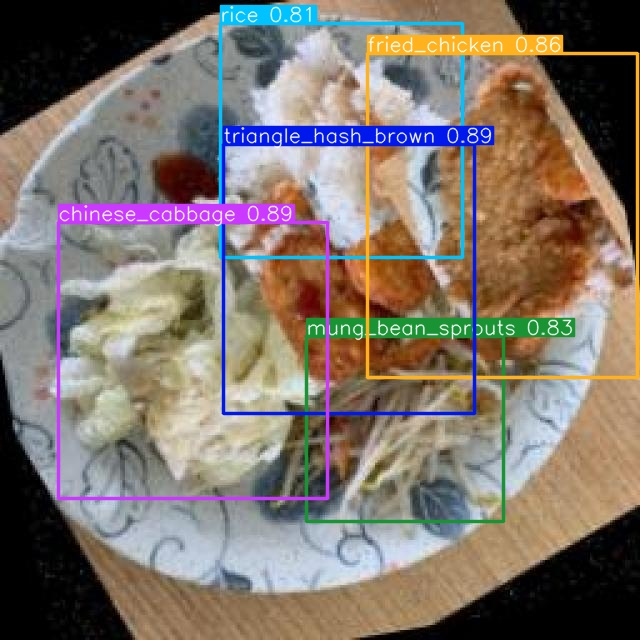

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/1028_191030_0052_jpg.rf.071ea64bbc1d5a94bed490d278f7c3d4.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")